In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

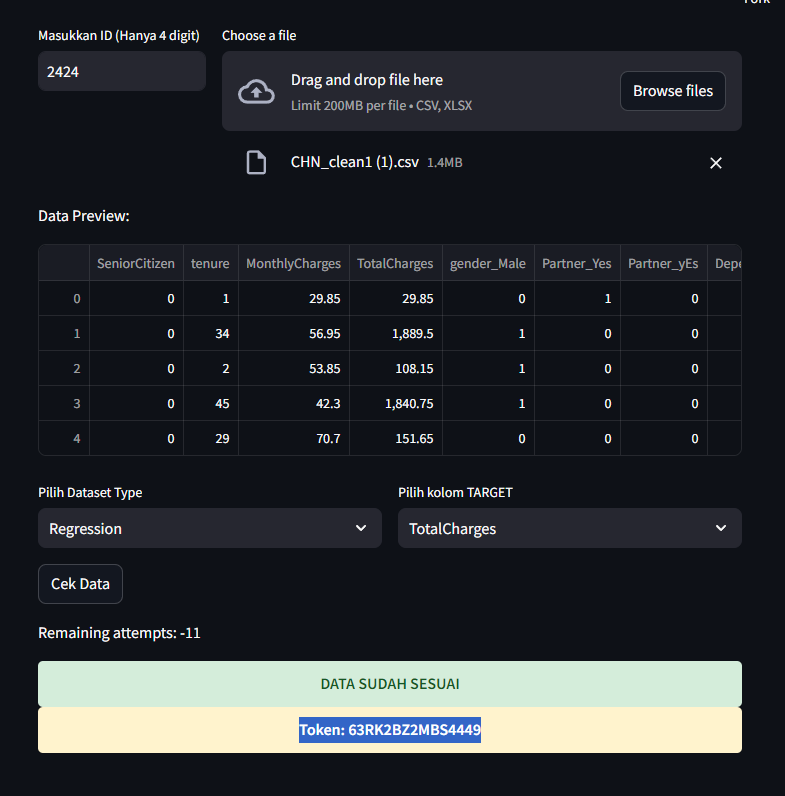

In [15]:
df = pd.read_csv('/content/CHN.csv')
df.head()

Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents tenure  \
0           0  7590-VHVEG  Female           0.0     Yes         No    1.0   
1           1  5575-GNVDE    Male           0.0      No         No   34.0   
2           2  3668-QPYBK    Male           0.0      No         No    2.0   
3           3  7795-CFOCW    Male           0.0      No         No   45.0   
4           4  9237-HQITU  Female           0.0      No         No    NaN   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check          29.85        29.85    No  
1               Mailed check          56.95       1889.5    No  
2               Mailed check          53.85       108.15   Yes  
3  Bank transfer (automatic)           42.3      1840.75    No  
4           Electronic check           70.7       151.65   Yes  

[5 rows x 22 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        11234 non-null  int64 
 1   customerID        11234 non-null  object
 2   gender            11234 non-null  object
 3   SeniorCitizen     9508 non-null   object
 4   Partner           11234 non-null  object
 5   Dependents        11234 non-null  object
 6   tenure            9526 non-null   object
 7   PhoneService      11234 non-null  object
 8   MultipleLines     11234 non-null  object
 9   InternetService   11234 non-null  object
 10  OnlineSecurity    11234 non-null  object
 11  OnlineBackup      11234 non-null  object
 12  DeviceProtection  11234 non-null  object
 13  TechSupport       11234 non-null  object
 14  StreamingTV       11234 non-null  object
 15  StreamingMovies   11234 non-null  object
 16  Contract          11234 non-null  object
 17  PaperlessBil

In [17]:
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [18]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'Unnamed: 0':
[    0     1     2 ... 11231 11232 11233]

Nilai unik pada kolom 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Nilai unik pada kolom 'gender':
['Female' 'Male']

Nilai unik pada kolom 'SeniorCitizen':
['0.0' nan '1.0' ... '0.009966377061848697' '0.9913752572613183'
 '0.0018739479537013093']

Nilai unik pada kolom 'Partner':
['Yes' 'No' 'yEs']

Nilai unik pada kolom 'Dependents':
['No' 'Yes' 'yeS' 'no']

Nilai unik pada kolom 'tenure':
['1.0' '34.0' '2.0' ... '31.001416683295137' '1.0079946006237008'
 '19.992739604191748']

Nilai unik pada kolom 'PhoneService':
['No' 'Yes' 'yEs' 'no']

Nilai unik pada kolom 'MultipleLines':
['No phone service' 'No' 'Yes' 'no' 'yeS']

Nilai unik pada kolom 'InternetService':
['DSL' 'Fiber optic' 'No']

Nilai unik pada kolom 'OnlineSecurity':
['No' 'Yes' 'No internet service' 'yeS' 'no']

Nilai unik pada kolom 'OnlineBackup':
['Yes' 'No' 'No internet service' 'yeS']


In [19]:
df = df.drop(columns=['Unnamed: 0', 'customerID'])
df['SeniorCitizen'] = df['SeniorCitizen'].replace('-', pd.NA)

In [20]:
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

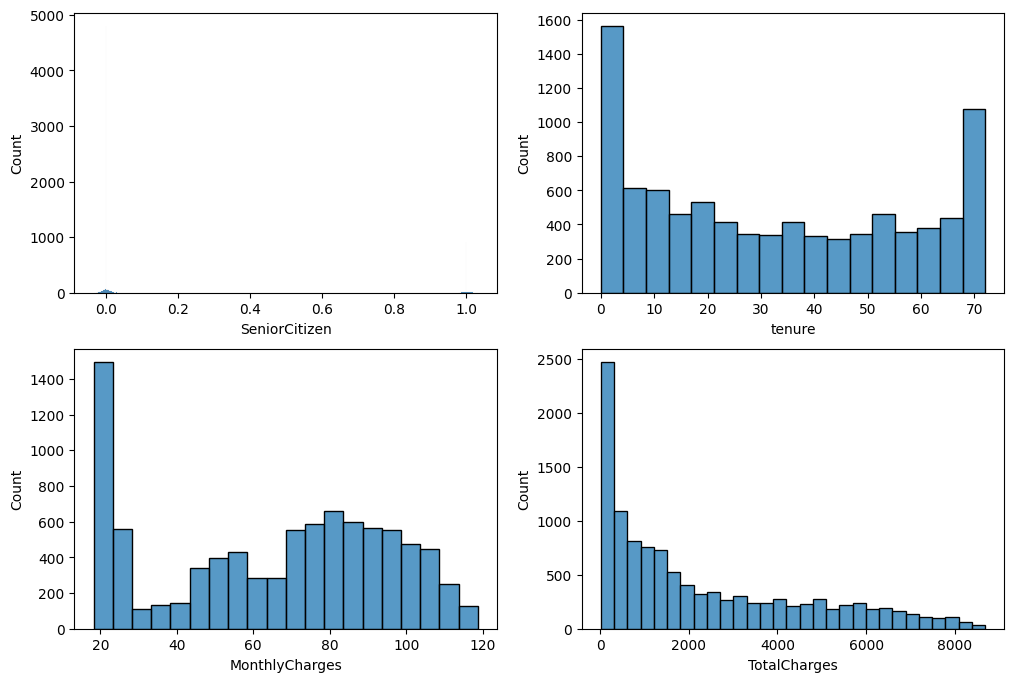

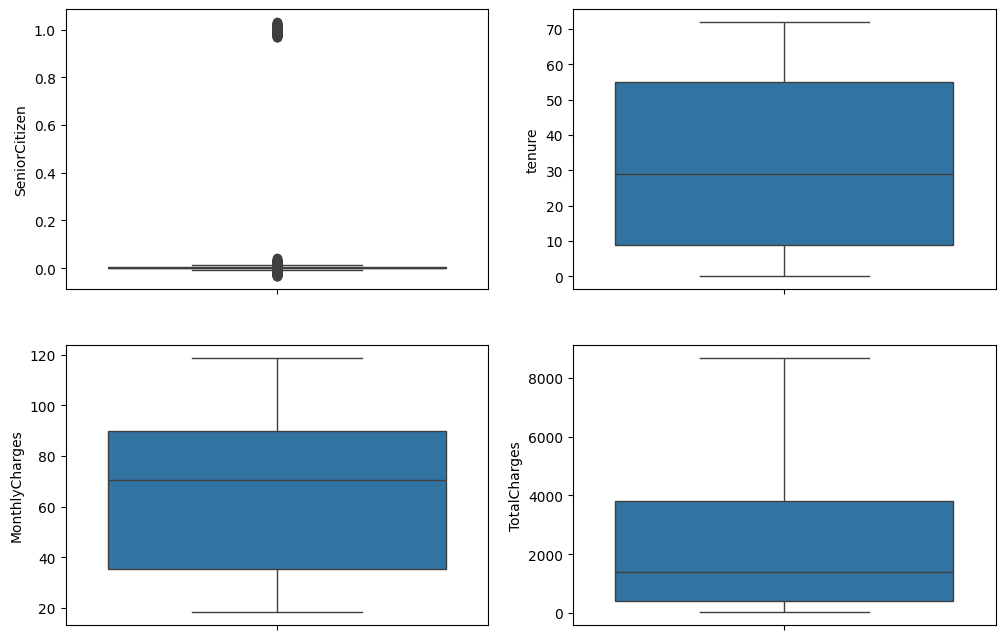

In [24]:
# Histogram
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['SeniorCitizen'], ax=ax[0, 0])
sns.histplot(df['tenure'], ax=ax[0, 1])
sns.histplot(df['MonthlyCharges'], ax=ax[1, 0])
sns.histplot(df['TotalCharges'], ax=ax[1, 1])
plt.show()

# Boxplot
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=df['SeniorCitizen'], ax=ax[0, 0])
sns.boxplot(data=df['tenure'], ax=ax[0, 1])
sns.boxplot(data=df['MonthlyCharges'], ax=ax[1, 0])
sns.boxplot(data=df['TotalCharges'], ax=ax[1, 1])
plt.show()

In [34]:
df['tenure'].fillna(df['tenure'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)
# modus
df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)

In [27]:
df.drop_duplicates(inplace=True)

In [36]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [37]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

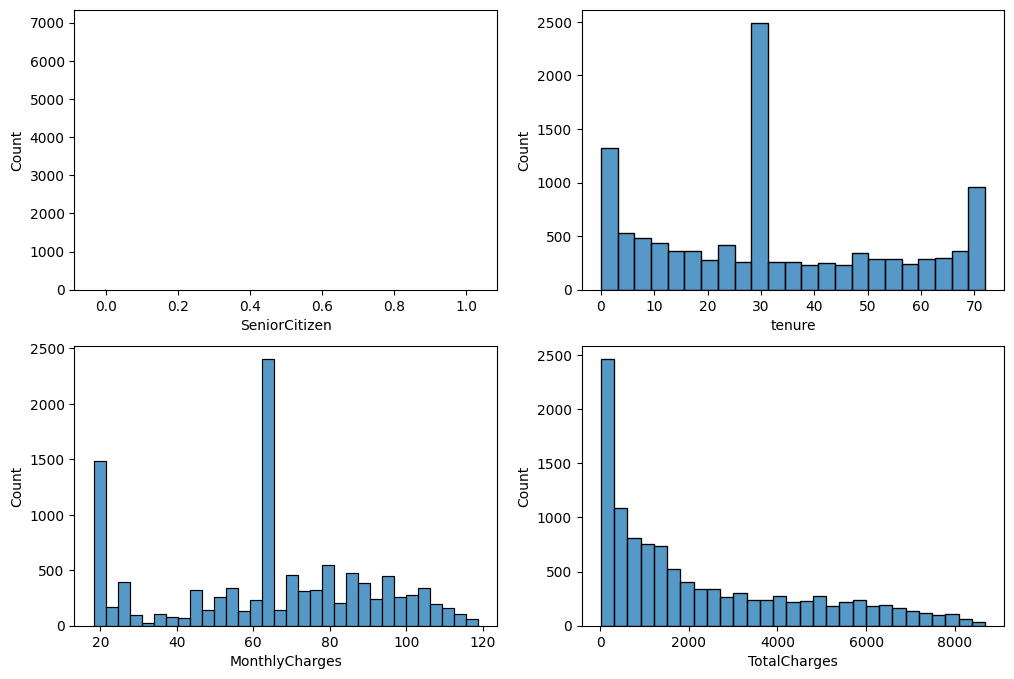

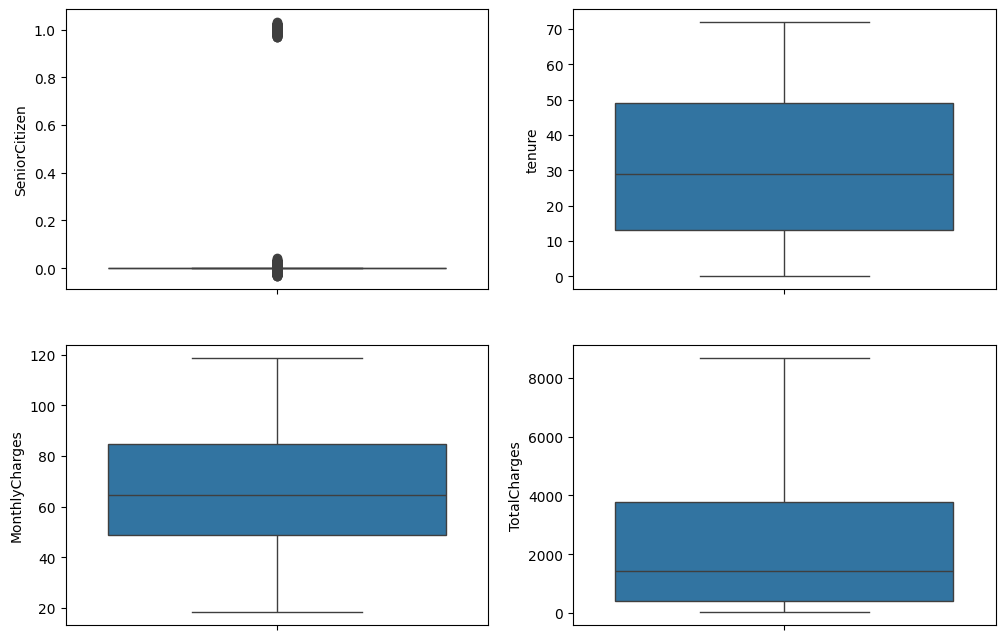

In [41]:
# Histogram
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['SeniorCitizen'], ax=ax[0, 0])
sns.histplot(df['tenure'], ax=ax[0, 1])
sns.histplot(df['MonthlyCharges'], ax=ax[1, 0])
sns.histplot(df['TotalCharges'], ax=ax[1, 1])
plt.show()

# Boxplot
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=df['SeniorCitizen'], ax=ax[0, 0])
sns.boxplot(data=df['tenure'], ax=ax[0, 1])
sns.boxplot(data=df['MonthlyCharges'], ax=ax[1, 0])
sns.boxplot(data=df['TotalCharges'], ax=ax[1, 1])
plt.show()

In [45]:
df['TotalCharges'].value_counts()
df['TotalCharges'].max()

8684.8

In [38]:
#one-hot encoded
df = pd.get_dummies(df, drop_first=True)

bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [46]:
df.duplicated().sum()

3

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11226 entries, 0 to 11233
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          11226 non-null  float64
 1   tenure                                 11226 non-null  float64
 2   MonthlyCharges                         11226 non-null  float64
 3   TotalCharges                           11226 non-null  float64
 4   gender_Male                            11226 non-null  int64  
 5   Partner_Yes                            11226 non-null  int64  
 6   Partner_yEs                            11226 non-null  int64  
 7   Dependents_Yes                         11226 non-null  int64  
 8   Dependents_no                          11226 non-null  int64  
 9   Dependents_yeS                         11226 non-null  int64  
 10  PhoneService_Yes                       11226 non-null  int64  
 11  PhoneSe

In [49]:
df.to_csv("CHN_clean1.csv", index=False)

In [23]:
asd

NameError: name 'asd' is not defined

# Trash

In [ ]:
'''# Convert non-numeric values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

sns.histplot(data=df, x='TotalCharges', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''median_TC = df['TotalCharges'].median()

df['TotalCharges'].fillna(median_TC, inplace=True)

df['TotalCharges'].unique()

In [ ]:
sns.histplot(data=df, x='TotalCharges', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

Dist normal cek

In [ ]:
# Convert non-numeric values to NaN
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')

sns.histplot(data=df, x='SeniorCitizen', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_SC = df['SeniorCitizen'].mean()

df['SeniorCitizen'].fillna(mean_SC, inplace=True)

df['SeniorCitizen'].unique()

In [ ]:
# Convert non-numeric values to NaN
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

sns.histplot(data=df, x='MonthlyCharges', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_SC = df['MonthlyCharges'].mean()

df['MonthlyCharges'].fillna(mean_SC, inplace=True)

df['MonthlyCharges'].unique()

In [ ]:
sns.histplot(data=df, x='MonthlyCharges', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert non-numeric values to NaN
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

sns.histplot(data=df, x='tenure', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_SC = df['tenure'].mean()

df['tenure'].fillna(mean_SC, inplace=True)

df['tenure'].unique()

sns.histplot(data=df, x='tenure', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['customerID'], inplace=True)

In [ ]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

In [ ]:
df_selected = ['PaymentMethod', 'Contract', 'gender','InternetService']

In [ ]:
df_other_columns = df.drop(columns=df_selected)

kolom_kategori = df_other_columns.select_dtypes(include=['object']).columns
kolom_kategori

In [ ]:
df_other_columns[kolom_kategori]

In [ ]:
for col in kolom_kategori:
    df_other_columns[col] = df_other_columns[col].str.lower()
    df_other_columns[col] = df_other_columns[col].str.split().str[0].map({'yes': 1, 'no': 0})

In [ ]:
df = df[df_selected]

In [ ]:
df_other_columns

In [ ]:
df_gabungan = pd.concat([df_other_columns, df], axis=1)

In [ ]:
df_gabungan.info()

In [ ]:
df_gabungan['InternetService'].value_counts()

In [ ]:
df_gabungan['PaymentMethod'].value_counts()

In [ ]:
df_gabungan['Contract'].value_counts()

In [ ]:
df_gabungan['gender'].value_counts()

In [ ]:
df_gabungan.duplicated().sum()

In [ ]:
df_gabungan = df_gabungan.drop_duplicates()

In [ ]:
df_gabungan.duplicated().sum()

In [ ]:
kolom_kategorikal = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

# Lakukan one-hot encoding
df_one_hot = pd.get_dummies(df_gabungan, columns=kolom_kategorikal)

print(df_one_hot)

In [ ]:
kolom_boolean = df_one_hot.select_dtypes(include=['bool']).columns.tolist()

In [ ]:
kolom_boolean

In [ ]:
df_one_hot[kolom_boolean] = df_one_hot[kolom_boolean].astype(int)

df_one_hot

In [ ]:
df_one_hot.info()

In [ ]:
df_one_hot = df_one_hot.astype(float)

In [ ]:
df_one_hot.to_csv('CHN_Clean.csv', index=False)

In [ ]:
df_one_hot.isnull().sum()

In [ ]:
df_one_hot.info()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Asumsikan Anda memiliki DataFrame bernama 'df' dengan kolom-kolom yang disebutkan

# Buat objek StandardScaler
scaler = StandardScaler()

# Pilih kolom yang ingin di-scale
columns_to_scale = ['TotalCharges', 'tenure', 'MultipleLines', 'MonthlyCharges']

# Fit dan transform data
df_one_hot[columns_to_scale] = scaler.fit_transform(df_one_hot[columns_to_scale])

# Tampilkan DataFrame setelah scaling
print(df_one_hot.head())

In [ ]:
df_one_hot['TotalCharges']

In [ ]:
# df_one_hot['log_TotalCharges'] = np.log(df_one_hot['TotalCharges'])

# Create the histogram
sns.histplot(data=df_one_hot, x='TotalCharges', bins=30)  # Adjust bins as needed

# Customize the plot
plt.title('Distribution of Log(TotalCharges)')
plt.xlabel('Log(TotalCharges)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_one_hot.info()

In [ ]:
df_one_hot.head()

In [ ]:
df_one_hot.to_csv('CHN_Clean.csv', index=False)

In [ ]:
asd

In [ ]:
df_one_hot = df_one_hot.drop('TotalCharges', axis=1)

ten MultipleLines mont tootal



---



In [ ]:
sdf

In [ ]:
kolom_boolean = kolom_boolean.columns

In [ ]:
kolom_boolean

In [ ]:
df_one_hot['kolom_boolean'] = df_one_hot['kolom_boolean'].astype(int)

print(df_one_hot)

In [ ]:
df['TotalCharges'].value_counts()

In [ ]:
sad

In [ ]:
'''# Mengganti nilai inf, -inf, dan string kosong dengan NaN
df['SeniorCitizen'] = df['SeniorCitizen'].replace([np.inf, -np.inf, " ", "-"], np.nan)
df['tenure'] = df['tenure'].replace([np.inf, -np.inf, " ", "-"], np.nan)
df['MonthlyCharges'] = df['MonthlyCharges'].replace([np.inf, -np.inf, " ", "-"], np.nan)
df['TotalCharges'] = df['TotalCharges'].replace([np.inf, -np.inf, " ", "-"], np.nan)'''

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.isnull().sum()

In [ ]:
sns.histplot(data=df, x='weight', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.info()

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['customerID'], inplace=True)

In [ ]:
df['OnlineBackup'].unique()

In [ ]:
df['TechSupport'].unique()